# TP 3

## Algorithme de descente de gradient

### Application : l’algorithme de descente du gradient

 L’id´ee est très simple : pour atteindre un minimum il faut que la fonction d´ecroisse, et, pour
l’atteindre le plus vite possible, nous allons utiliser l’information port´ee par le gradient. Pour une fonction $f$ : $ \mathbb{R}^2 \rightarrow \mathbb{R}$, on espère donc suivre le chemin suivant sur son graphe :

<img src="img/descente_gradient.png" alt="alt_text" align="center"/>

#### algorithme :

on cherche le minimum de $f$ : $\mathbb{R}^n \rightarrow \mathbb{R}$ : <br>
1) Initialiser avec $X_0 \in \mathbb{R}^n$ (au hasard) <br>
2) Répéter $$ X_{n+1} = X_n - \eta \nabla f(X_n)$$ <br>
3) jusqu'à convergence <br>
<br>

Cela a le mérite d’être très simple, et, en terme de coût de calcul, ce qui est très simple est très efficace.<br>
Dans l’´etape (2), on notera que le − vient du fait qu’on cherche à minimiser : c’est donc $- \nabla f$ qui indique la direction optimale de descente (on voudrait maximiser, on suivrait $+ \nabla f$). Le paramètre positif $\eta$ n’est pas déterminé par la théorie mathématique : c’est juste le paramètre qui précise la taille des “sauts” que fera l’algorithme à chaque itération. Il conviendra de le choisir “intelligemment” : ni trop grand pour éviter de passer “au-dessus” d’un minimum sans le voir, ni trop petit pour éviter que l’algorithme converge trop lentement :

<img src="img/eta.png" alt="alt_text" align="center"/>

***
## Code et premières expérimentations

_Coder une méthode de descente pour la minimisation d’une fonction d’une variable réelle._ Faire un code reprenant l’algorithme (1)-(3) dans le cas d’une fonction d’une variable. Evidemment il faut penser à mettre un test de convergence (avec un seuil que vous choisirez) pour arrêter l’algorithme itératif. Le tester sur l’exemple suivant:
\begin{cases}
    f(x) = x^2 - x + 1 \\
    \nabla f(x) = \frac{\partial f(x)}{\partial x} = f'(x) = 2x-1
\end{cases}
Il n'y a qu'un seul paramètre, la dérivée partielle est égale à la dérivée.

Faire varier la valeur de eta ($\eta$) et le point initial $x_0$ : quels effets observe-t-on ?

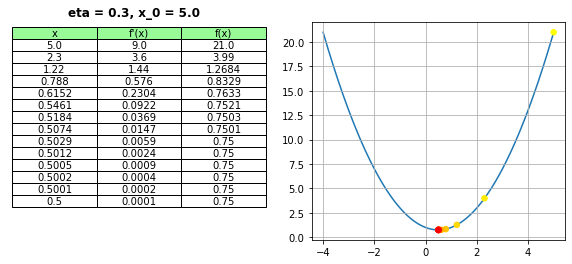

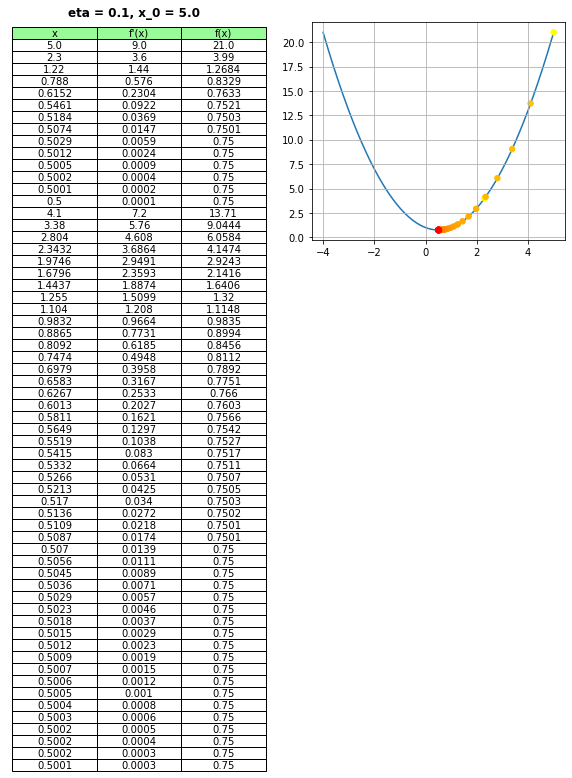

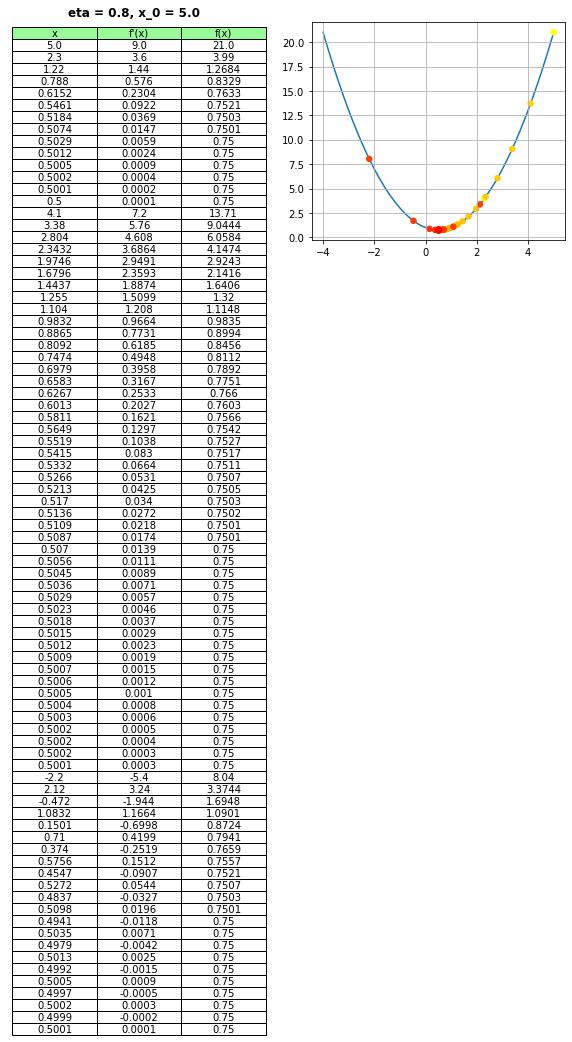

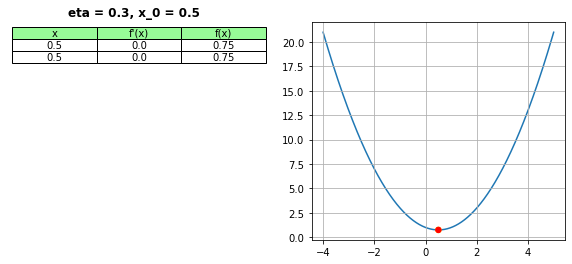

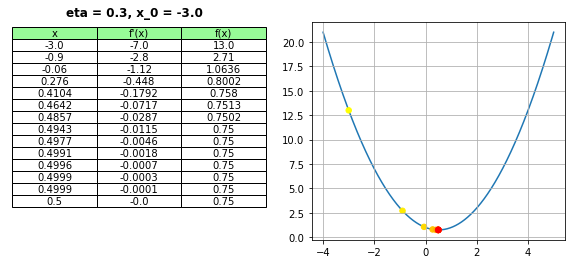

In [1]:
import numpy as np
import matplotlib.pyplot as plt

def descente(f, df, X, eta, epsilon):
    x = X[0]
    save = x + 1
    while abs(f(x) - f(save)) > epsilon :
        save = x
        X.append(x-eta*df(x))
        x = X[-1]
    return np.array(X)

def affichage(F, dF, A, eta):
    #affichage en deux parties : un graphe et une table de données
    fig,ax = plt.subplots(1,2,figsize=(10,4)) #création de la figure
    
    #partie graphe
    X = np.linspace(-4,5,1000) #axe x
    ax[1].plot(X, F(X), zorder=-3) #afficher f(x)
    ax[1].scatter(A, F(A), c=np.linspace(1,0,len(A)), cmap='autumn', s=30) #afficher les itérations de l'algorithme
    ax[1].grid()
    
    #partie table
    val1 = ["x", "f'(x)", "f(x)"] #tête de la table
    #données arrondies à 4 décimales
    val3 = np.around(np.transpose(np.array([A, dF(A), F(A)], dtype=float)), 4)

    ax[0].set_axis_off() 
    table = ax[0].table( 
        cellText = val3,
        colLabels = val1,
        colColours =["palegreen"] * 10, 
        cellLoc ='center',
        loc ='upper left')
    ax[0].set_title(f'eta = {eta}, x_0 = {A[0]}', fontweight ="bold") 

if __name__ == "__main__" :
    #initialisation des variables
    F = lambda x : x**2 - x + 1
    dF = lambda x : 2*x - 1
    X_0 = [5]
    Eta = 0.3
    Epsilon = 10**(-8)
    
    #calcul du minimum
    A = descente(F, dF, X_0, Eta, Epsilon)
    affichage(F, dF, A, Eta)
    
    Eta = 0.1
    A = descente(F, dF, X_0, Eta, Epsilon)
    affichage(F, dF, A, Eta)
    
    Eta = 0.8
    A = descente(F, dF, X_0, Eta, Epsilon)
    affichage(F, dF, A, Eta)
    
    Eta = 0.3
    X_0 = [0.5]
    A = descente(F, dF, X_0, Eta, Epsilon)
    affichage(F, dF, A, Eta)
    
    X_0 = [-3]
    A = descente(F, dF, X_0, Eta, Epsilon)
    affichage(F, dF, A, Eta)

***
Coder une méthode de descente pour la minimisation d’une fonction de deux variables réelles. Faire un code reprenant l’algorithme (1)-(3) dans le cas d’une fonction de deux variables réelles, <br>
$f$ : $\mathbb{R}^2 \rightarrow \mathbb{R}$. Le tester avec la fonction
$$f(x, y) = x^2 + 1.8xy + y^2 $$
à partir du point initial $X_0 = (x_0, y_0) = (−0.9, 1)$, puis à partir de $X_0 = (x_0, y_0) = (−1, 1)$.


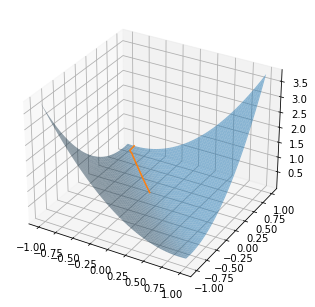

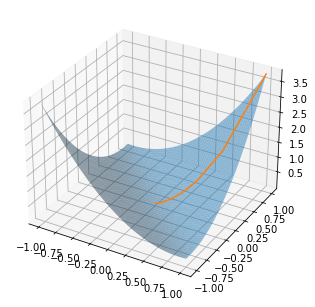

In [61]:
from mpl_toolkits.mplot3d import Axes3D
import warnings
warnings.filterwarnings('ignore') #pour ignorer les warnings

def descente2D(f, df, X, eta, epsilon):
    x = X[0]
    save = x + 1
    while (abs(f(x[0],x[1]) - f(save[0], save[1])) > epsilon) :
        save = x
        X.append(x-eta*df(x[0],x[1]))
        x = X[-1]
    return np.array(X)

def affichage2D(F, A, limits=((-1,1),(-1,1))):
    #affichage
    ax = Axes3D(plt.figure())
    
    xmin,xmax = limits[0]
    ymin,ymax = limits[1]
    X,Y = np.linspace(xmin,xmax,100),np.linspace(ymin,ymax,100)
    XX,YY = np.meshgrid(X,Y)
    M = F(XX,YY).reshape(len(XX),len(YY))
    ax.plot_surface(XX,YY,M, alpha = 0.5)
    
    ax.plot(A[:,0], A[:,1], F(A[:,0], A[:,1]), zorder = 5)

if __name__ == "__main__" :
    #initialisation des variables
    F = lambda x,y : x**2 + 1.8*x*y + y**2
    dF = lambda x,y : np.array([2*x+1.8*y, 2*y+1.8*x])
    X_0 = [np.array([-0.9,1])]
    Eta = 0.3
    Epsilon =  10**(-3)
    
    #calcul du minimum
    A = descente2D(F, dF, X_0, Eta, Epsilon)
    affichage2D(F,A)
    
    X_0 = [np.array([1,1])]
    Eta = 0.1
    A = descente2D(F, dF, X_0, Eta, Epsilon)
    affichage2D(F,A)

On remarque que l'algorithme continue d'évoluer lorsque le minimum de la fonction n'est pas un point mais une ligne de niveau. Le meilleur moyen d'éviter cela est de commencer l'algorithme suffisamment loin de cette ligne de niveau.

Mêmes questions pour la fonction
$$f(x, y) = {1 \over 100} (1 − x)^2 + (y − x^2)^2$$
à partir de $X_0 = (x_0, y_0) = (−1, 0)$.

[[-1.00000000e+00  0.00000000e+00]
 [-9.99878788e-01  6.00000000e-05]
 [-9.99757627e-01  1.19981855e-04]
 ...
 [-5.43527699e-01  2.84930551e-01]
 [-5.43526082e-01  2.84931180e-01]
 [-5.43524466e-01  2.84931810e-01]]


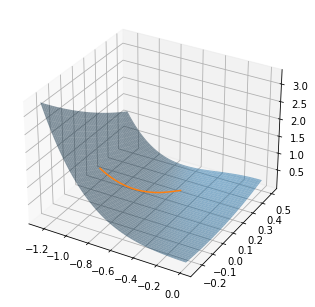

In [18]:
if __name__ == "__main__" :
    #initialisation des variables
    F = lambda x,y : (1/100)*(1-x)**2 + (y-x**2)**2
    h = 10**(-3)
    dF = lambda x,y : np.array([(F(x+h,y)-F(x-h,y))/2*h,(F(x,y+h)-F(x,y-h))/2*h])
    X_0 = [np.array([-1,0])]
    Eta = 0.3
    Epsilon =  10**(-7)
    
    #calcul du minimum
    A = descente2D(F, dF, X_0, Eta, Epsilon)
    print(A)
    affichage2D(F,A, limits=((-1.25,0),(-0.25,0.5)))

***
## Application : régression linéaire

Etant donné un nuage de points $(x_i, y_i)^n_{i=1}$ la droite des moindres
carrés (ou droite de régression linéaire) est la droite d’équation $y = mx + p$ qui minimise la quantité
$$F(m,p) = \sum_{k=1}^n (y_k - m x_k - p)^2 $$ 
Générer des données, par exemple 100 points de coordonnées dans $[-1,1]$, non équirépartis (d’où la loi normale ci-dessous) :

In [20]:
X = np.linspace(-1, 1, 100) + np.random.normal(0, 0.25, 100)
Y = np.linspace(-1, 1, 100) + np.random.normal(0, 0.25, 100)

### _La solution analytique_

Il est possible de calculer explicitement les coefficients m et p solution (c’est l’objet de l’exercice 6 des Exercices sur le chapitre 4 du cours). Si $\sum_{k=1}^n (x_k - x') \neq 0$, on trouve les formules suivantes :
$$ m = \frac{\sum_{k=1}^n (x_k - \bar{x})(y_k -  \bar{y})}{\sum_{k=1}^n (x_k - \bar{x})^2} $$
où on a noté $\bar{x}$ et $\bar{y}$ les valeurs moyennes respectives de $(x_i)_{i=1,...,n}$ et $(y_i)_{i=1,...,n}$, et 
$$ p = {1 \over n} \sum_{k=1}^n (y_k - mx_k).$$

• Afficher le nuage de points et la droite de régression d’équation $y = mx + p$, $m$ et $p$ étant obtenus avec les formules ci-dessus.

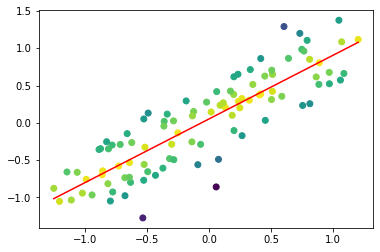

In [50]:
n = len(X)
x_moy = X.mean()
y_moy = Y.mean()

#calcul de m

numerateur = 0
denominateur = 0
for k in range(n):
    numerateur+=(X[k]-x_moy)*(Y[k]-y_moy)
    denominateur+=(X[k]-x_moy)**2
m = numerateur/denominateur

#calcul de p
s = 0
for k in range(n):
    s+=(Y[k] - m*X[k])
p = s/n

#affichage
x = np.linspace(min(X), max(X), len(X))
plt.scatter(X, Y, c=-abs((m*X+p)-Y))
plt.plot(x, m*x + p, c='r')

### _La solution par la méthode de descente de gradient_

Trouver une approximation de $m$ et $p$ obtenue gräce à la méthode de gradient obtenue au paragraphe _2.1.2_. On rappelle que la fonction à minimiser est
celle qui minimise l’erreur au sens des moindres carrés :
$$(m,p) \mapsto F(m,p) = \sum_{k=1}^n (y_k - mx_k - p)^2.$$
Tracer la droite correspondante d’équation $y = m_{app} x + p_{app}$ sur la même figure que le nuage de points et la droite de régression $y = mx + p$.<br>
Ajouter un affichage de l’erreur entre la droite de régression approchée et la droite de régression en fonction du nombre d’itérations pour rendre plus rigoureuse l’analyse visuelle des résultats.

3008


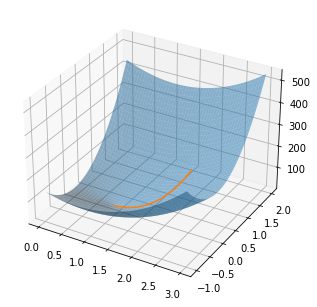

In [105]:
def MC(m,p,X,Y):
    n = len(X)
    S = 0
    for k in range(n):
        S+=(Y[k] - m*X[k] - p)**2
    return S

if __name__ == '__main__' :
    F = lambda m,p : MC(m,p,X,Y)
    h = 10**(-3)
    dF = lambda x,y : np.array([(F(x+h,y)-F(x-h,y))/2*h,(F(x,y+h)-F(x,y-h))/2*h])
    X_0 = [np.array([2,1])]
    Eta = 20
    Epsilon =  10**(-5)
    
    #passage des valeurs par l'algorithme
    A = descente2D(F, dF, X_0, Eta, Epsilon)
    affichage2D(F, A, limits=((0,3),(-1,2)))
    print(len(A))

_comparaison avec la droite de régression_

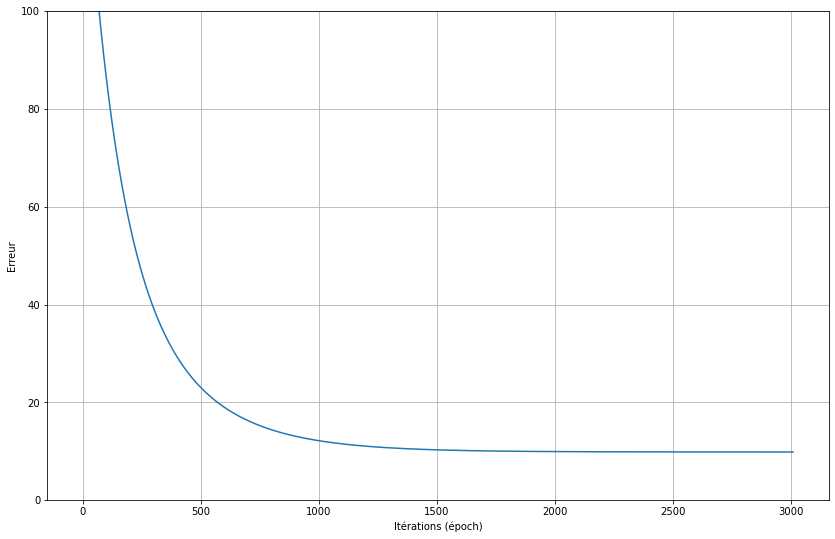

In [185]:
#import de pylab pour les colormaps
import pylab as pl
import matplotlib as mpl

#évolution de l'erreur par le nombre d'itérations
fig, ax = plt.subplots(1,1,figsize=(14,9))

ax.plot(np.arange(len(A)), F(A[:,0],A[:,1]))
ax.set_ylim(0,100)
ax.set_xlabel('Itérations (époch)')
ax.set_ylabel('Erreur')
ax.grid()

_erreur entre la fonction analytique et la fonction approchée par descente_

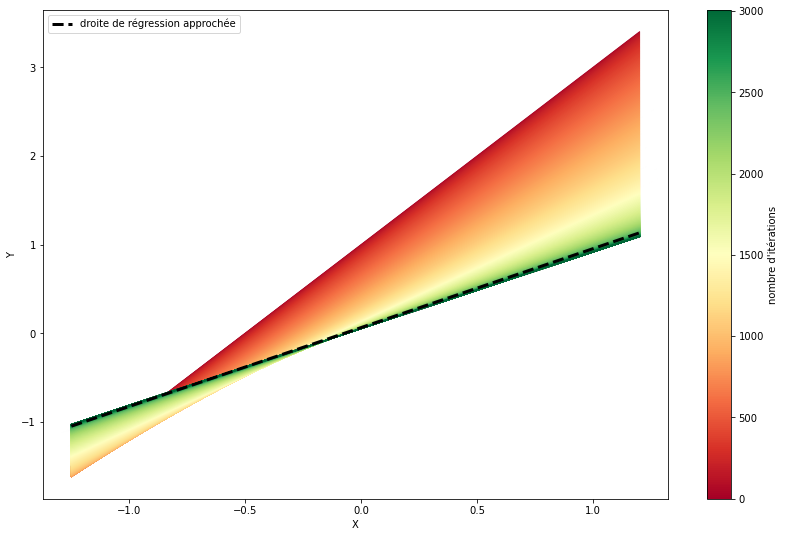

In [183]:
fig, ax = plt.subplots(1,1,figsize=(14,9))

#tracé de la droite de régression approchée
ax.plot(x, m*x+p, c='k', zorder=3, ls='--', lw=3, label="droite de régression approchée")

#tracé des approximations successives de la descente de gradient
colors = pl.cm.RdYlGn(np.linspace(0,1,len(A))**0.5)
for i in range(len(A)):
    ax.plot(x, A[i,0]*x+A[i,1], lw=1, c=colors[i])

#ajout de la colorbar avec des ticks toutes les 500 itérations
norm = mpl.colors.Normalize(vmin=0,vmax=2)
sm = plt.cm.ScalarMappable(cmap='RdYlGn', norm=norm)
sm.set_array([])
T = np.arange(0, len(A), 500)*2/len(A)
clb = plt.colorbar(sm, ticks=T, boundaries=np.linspace(0,2,len(A)))
dum = clb.ax.set_yticklabels(np.arange(0, len(A), 500))

#ajout d'autres labels
ax.set_xlabel('X')
ax.set_ylabel('Y')
ax.legend()
clb.set_label("nombre d'itérations")